# <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#B03060"> Vamsi Pasala - Travel Package Purchase Prediction 


## Description

## Background and Context
You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Description

**Data Dictionary**

**Customer details:**

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are - -ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:**

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

# 1. Loading libraries

### Import required libraries for the project.

In [97]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

### Load data

In [98]:
travel = pd.read_excel("Tourism.xlsx",sheet_name=1) # Loaded data in to Pandas Dataframes

### Copy loaded data to new variable

In [99]:
data = travel.copy() # Copy data in to new variable data

### View the first and last 5 rows of the dataset.

In [100]:
data.head() # verify the first five rows in the data frame

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [101]:
data.tail()  # verify the last five rows in the data frame

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### View the first 10 rows of the dataset by Sorting by Age.

In [102]:
data.head(10).sort_values(['Age'], ascending=True) # Verifying the data by sorting by age

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Check the data types of the columns for the dataset.

In [103]:
data.info() # verifying the variables and data types in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observations -**
* There are null values in the dataset.
* We can convert the object type columns to categories.
* TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation are object data type and remaining are Integer and float

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [104]:
cols = data.select_dtypes(['object']) # load all the columns with data type
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [105]:
for i in cols.columns:
    data[i] = data[i].astype('category') # convert data type object to categorical

In [106]:
data.info() # checking the info of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

* Object based data type columns have been converted to Category
* `we can see that the memory usage has decreased from 793.9 KB to 564.5 KB`, this technique is generally useful for bigger datasets.

### Understand the shape of the dataset.

In [107]:
x = data.shape  # verify the shape of the data and print to it.
print(f"Number of rows {x[0]} and columns {x[1]} in in data set")

Number of rows 4888 and columns 20 in in data set


In [108]:
data.isnull().sum().sort_values(ascending=False) # check if any rows has null values

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

**Observations -**
* DurationofPitch has most null values
* Monthly Income stand second

Percentage of null values are less than the perctange of non-null values. Null values can be treated or can be dropped

### Processing columns

* Fill the null value with Median value of the column
* Updating Gender value "Fe Male" with "Female"

In [109]:
# fill the null values with the median value of the column to avoid modeling errors
data[["Age","DurationOfPitch","NumberOfFollowups","PreferredPropertyStar","NumberOfTrips","NumberOfChildrenVisiting","MonthlyIncome"]] = data.groupby(["Occupation","Designation"])[
    ["Age","DurationOfPitch","NumberOfFollowups","PreferredPropertyStar","NumberOfTrips","NumberOfChildrenVisiting","MonthlyIncome"]
].transform(lambda x: x.fillna(x.median()))

* `Age`,`DurationOfPitch`,`NumberOfFollowups`,`PreferredPropertyStar`
* `NumberOfTrips`,`NumberOfChildrenVisiting`,`MonthlyIncome`

Null values are replaced with Median values

In [110]:
data.isnull().sum().sort_values(ascending=False) # Checking null values sorted by highest number of null values

TypeofContact               25
CustomerID                   0
PreferredPropertyStar        0
Designation                  0
NumberOfChildrenVisiting     0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
NumberOfTrips                0
MaritalStatus                0
ProductPitched               0
ProdTaken                    0
NumberOfFollowups            0
NumberOfPersonVisiting       0
Gender                       0
Occupation                   0
DurationOfPitch              0
CityTier                     0
Age                          0
MonthlyIncome                0
dtype: int64

Null values of all the non-categorical columns are reduced and `TypeofContact` has some more null values. Will be dropped

In [111]:
data.dropna() # Droping null values

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,31.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


Data Set after dropping the rows with Null values

In [112]:
data.Gender.unique() # Getting unique values in the gender column

['Female', 'Male', 'Fe Male']
Categories (3, object): ['Female', 'Male', 'Fe Male']

* Geneder column has three values 'Female', 'Male' and 'Fe Male'. Cleaning the data for the more accurate results and data consistency

In [113]:
# Function to replace 'Fe Male' with 'Female'
def gender_conv(val):
    if val =='Male': # Check the value and replace
        return "Male"
    elif val == "Female": # Check the value and replace
        return "Female"
    else:
        return "Female"

data['Gender'] = data['Gender'].apply(gender_conv).astype('category') # Calling the above function to modify data
data['Gender'].head() # Checking First five rows of data

0    Female
1      Male
2      Male
3    Female
4      Male
Name: Gender, dtype: category
Categories (2, object): ['Female', 'Male']

### Summary of the dataset.

In [114]:
data.describe().T # Statstical analysis of numerical columns

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.421440,9.157354,18.0,31.00,36.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.388707,8.311019,5.0,9.00,13.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.242840,1.824663,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


* `CustomerID` is an ID variable variable and not useful for predictive modelling
* `ProdTaken` is a dependent variable, whose output will be predicted by the model
* `Age` of the customer range form 18 to 61 and average age is 36
* `CityTier` feature gives the information regarding in which area of the city the customer lives. Three values 1, 2 and 3
* `DurationOfPitch` is how long the cusomter service specailist spoke to customer sell the new product
* `NumberOfPersonVisiting` feature give the information regarding no of persons accompying the customers on to the trip, Min is 1 and max is 5. Avergae size is 3
* `NumberOfFollowups` number of times does the sales represntative followed up with customer to sell the product. Max times is 6 and average is 4
* `PreferredPropertyStar` is a important feature to predict the outcome as this feature will give information reagarding what type of property does customer like min is 1 nd max is 5 average value is 4 star
* `NumberOfTrips` Customers have taken max of 22 trip and min of 1 with average of 3 trips
* `Passport` feature will give info that how many cutomers are ready to travel international
* `PitchSatisfactionScore` How many cusomters are satisfied with sales pitch, max score is 5 and average score is 3
* `OwnCar` This feature will provide information regarding how many customers own the car or not
* `NumberOfChildrenVisiting` Number of children accompanied in the trip is important as children attractions can be included. Max children accompanied is 3
* `MonthlyIncome` Monthly income of the customer is used in the model to predict the outcome, Minimum monthly income is 1000 amd max is 98678.0. It is evident that customer with all income levels are purchasing the holiday packages

In [115]:
data.describe(include=['category']).T # Statstical analysis of Categorical columns

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


* `TypeofContact` - Majority of custmers made self enquiry
* `Occupation` - customers has 4 types of occupation with majority are salaried
* `Gender` - Maximum number of males are going for vacation
* `ProductPitched` - 4 types of products are being offered to the customers and majority are Based package
* `MaritalStatus` - Married customer are going out more on vacations 
* `Designation` - Executives are the majority of the customers 

**Dropping columns which are not adding any information.**

In [116]:
data.drop(['CustomerID'],axis=1,inplace=True) # Dropping customer id as it not useful

In [117]:
data.head(10) # Checking first 10 rows after dropping customer id.

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,31.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


**Let's look at the unqiue values of all the categories**

In [118]:
cols_cat= data.select_dtypes(['category']) # Loading all the categorical columns in to object

In [119]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50) # Getting the unique values from the categorical columns

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male      2916
Female    1972
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executive         1842
Man

### EDA

### Univariate analysis

In [120]:
# function to plot a boxplot and a histogram along the same scale.


def my_histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on Age

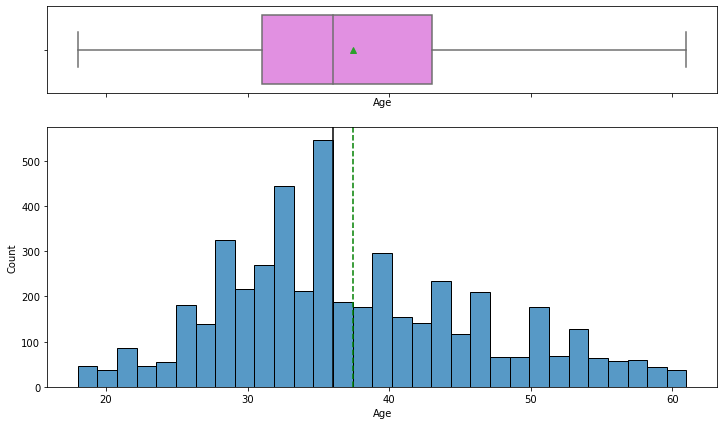

In [121]:
my_histogram_boxplot(data,'Age') # Calling function for feature Age

* Age is looking normally distributed, with a hint of right skew.

### Observations on CityTier

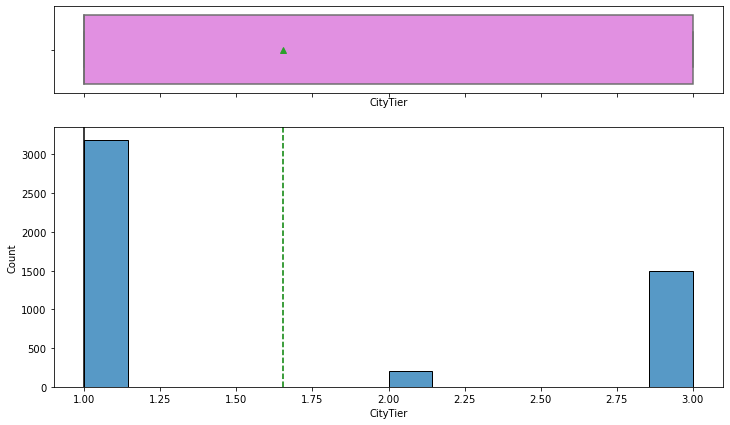

In [122]:
my_histogram_boxplot(data,'CityTier') # Calling function for feature CityTier

* City Tier is looking normally distributed with Mean value of 1 and max value as 3

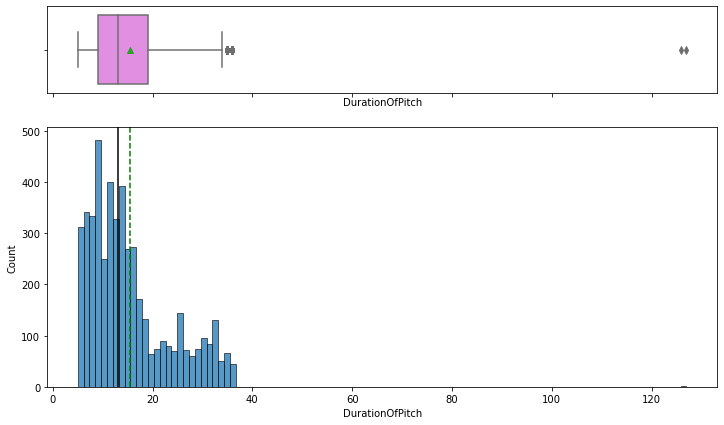

In [123]:
my_histogram_boxplot(data,'DurationOfPitch') # Calling function for feature DurationOfPitch

* DurationofPicth is right skewed with some outliers

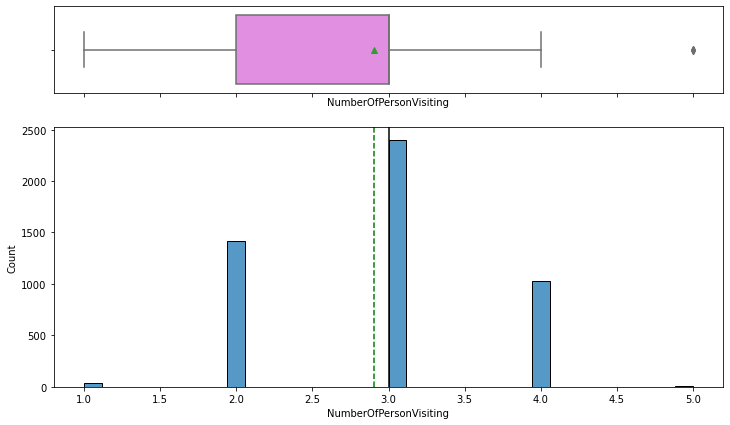

In [124]:
my_histogram_boxplot(data,'NumberOfPersonVisiting') # Calling function for feature NumberOfPersonVisiting

* NumberofPersonVisiting is looking normally distributed with max value of 5 and outliers are noticed

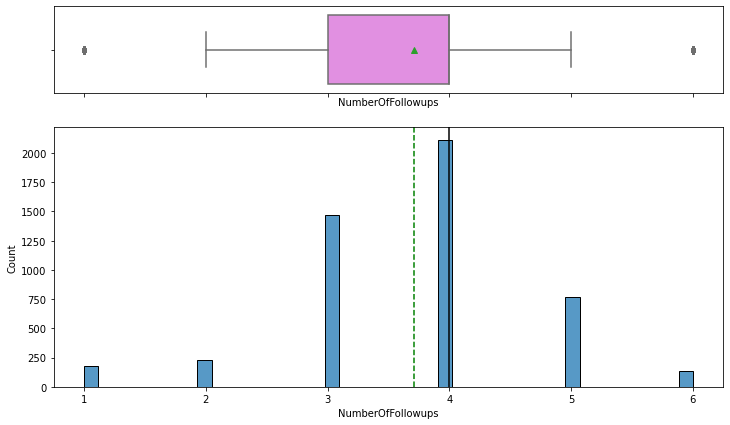

In [125]:
my_histogram_boxplot(data,'NumberOfFollowups') # Calling function for feature NumberOfFollowups

* NumberofFollowups is looking normally distributed, with a mean value of 4. Outliers are noticed at both the ends.

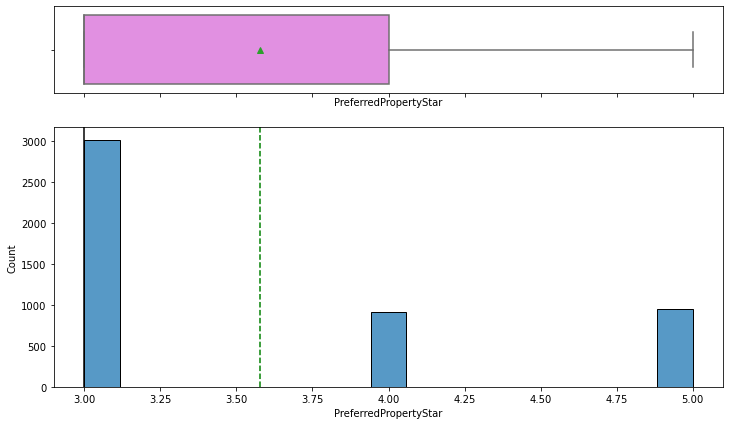

In [126]:
my_histogram_boxplot(data,'PreferredPropertyStar') # Calling function for feature PreferredPropertyStar

* PreferredPropertyStar is looking normally distributed, with a hint of right skew.

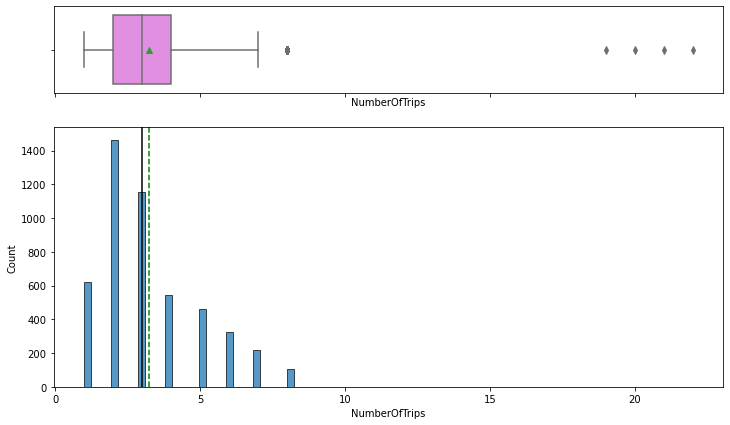

In [127]:
my_histogram_boxplot(data,'NumberOfTrips') # Calling function for feature NumberOfTrips

* PreferredPropertyStar is looking normally distributed, with a hint of right skew. Some outliers are noticed

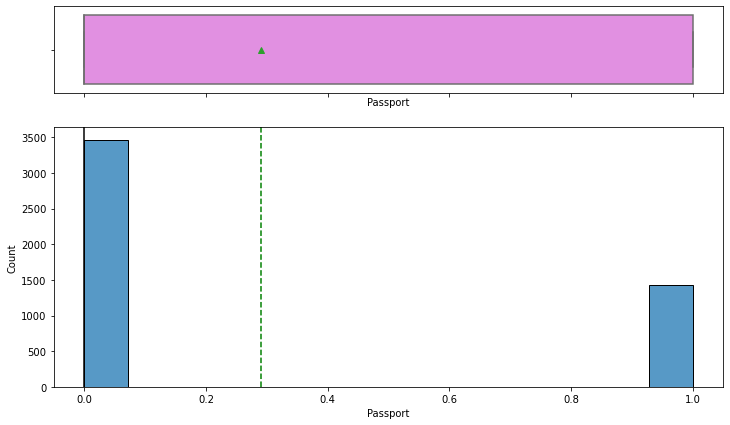

In [128]:
my_histogram_boxplot(data,'Passport')  # Calling function for feature Passport

* Passport is looking normally distributed and not giving much of information

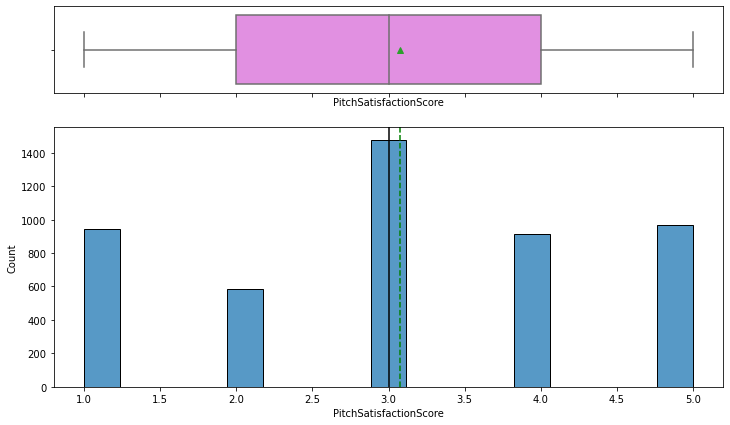

In [129]:
my_histogram_boxplot(data,'PitchSatisfactionScore') # Calling function for feature PitchSatisfactionScore

* PitchSatisfactionScore is looking normally distributed and median value is 3, with a hint of right skew

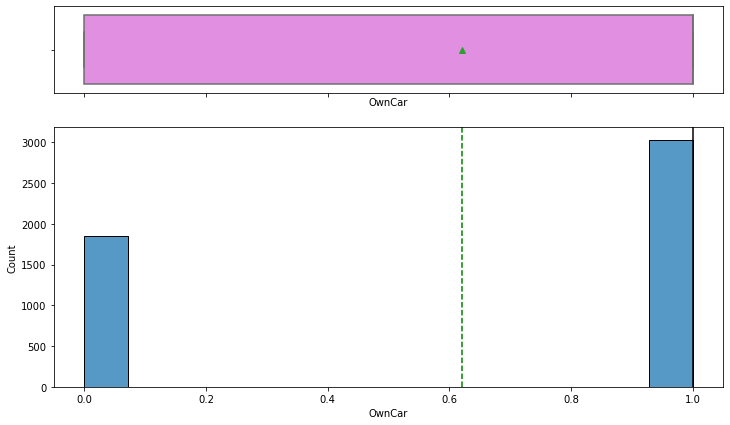

In [130]:
my_histogram_boxplot(data,'OwnCar')  # Calling function for feature OwnCar

* OwnCar is looking normally distributed and with a hint of left skew

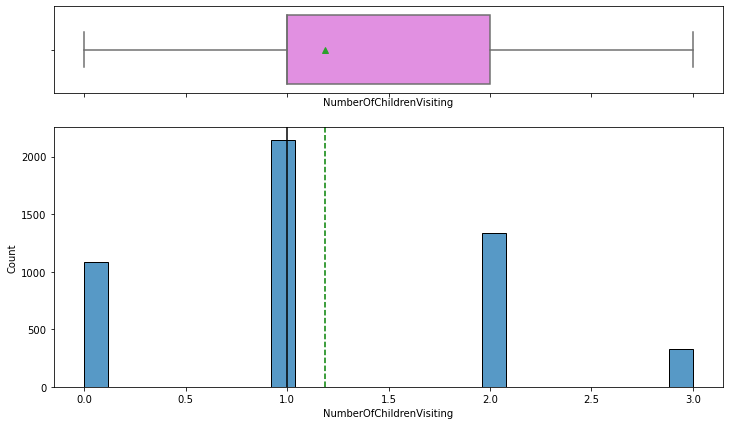

In [131]:
my_histogram_boxplot(data,'NumberOfChildrenVisiting') # Calling function for feature NumberOfChildrenVisiting

* NumberOfChildrenVisiting is looking normally distributed and with a hint of right skew, no outliers observed
* Most of the customers has one children

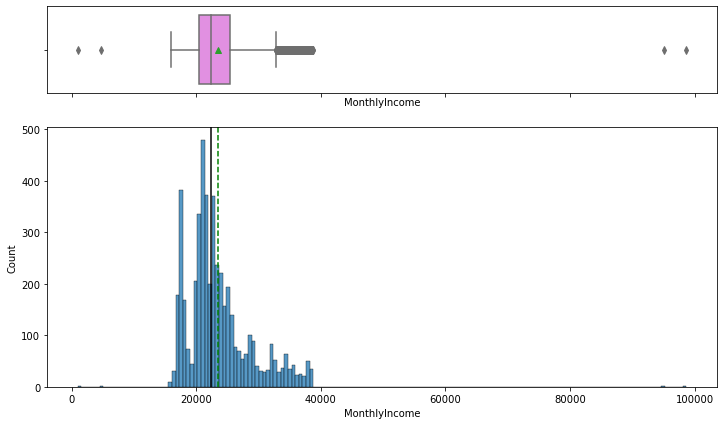

In [132]:
my_histogram_boxplot(data,'MonthlyIncome') # Calling function for feature MonthlyIncome

* MonthlyIncome is looking normally distributed and with a hint of right skew, outliers observed
* Average Monthly income is 250000

In [133]:
# function to create labeled barplots


def my_labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

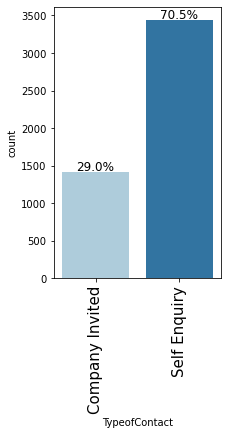

In [134]:
my_labeled_barplot(data, "TypeofContact", perc=True)  # Calling function for feature TypeofContact

* 70.5 % of customers are came through self enquiry and 29 & are through Company marketing

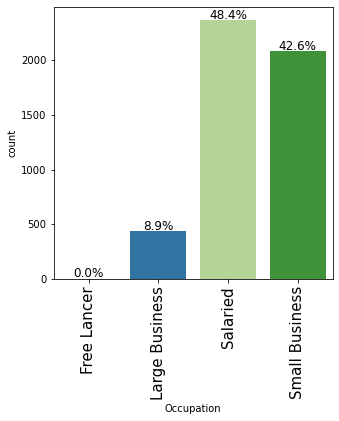

In [135]:
my_labeled_barplot(data, "Occupation", perc=True)  # Calling function for feature Occupation

* Customers with income from salary (working class) is spending on vacations
* Customers of occupation with free lancers are going any vacation

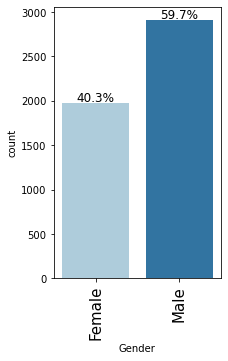

In [136]:
my_labeled_barplot(data, "Gender", perc=True)  # Calling function for feature Gender

* 59.7% Men are going on vacation and customer base of the company.
* 40.3% Women are going on vacation followed by men

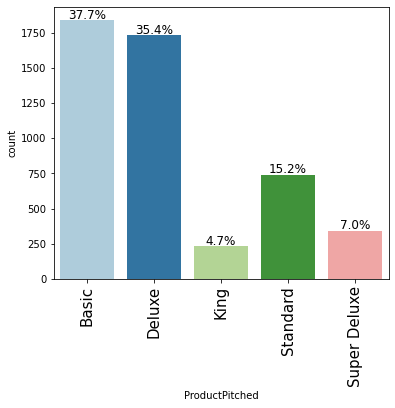

In [137]:
my_labeled_barplot(data, "ProductPitched", perc=True)  # Calling function for feature ProductPitched

* It is evident that most famous product that customer are opting are Basic
* 35.4% customer are purchased Deluxe pacakage

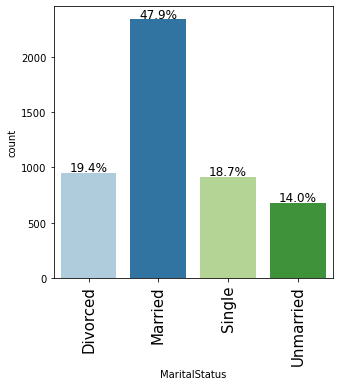

In [138]:
my_labeled_barplot(data, "MaritalStatus", perc=True)  # Calling function for feature MaritalStatus

* Married couple are the most customers purchasing vacation packages with the company
* Where all together customer who are not currenly married are most of the customer base

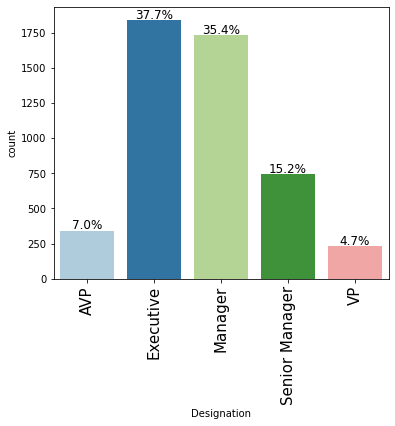

In [139]:
my_labeled_barplot(data, "Designation", perc=True)  # Calling function for feature Designation

* Executive are the fisrt most customer base with 37.7%
* Managers are the second most customer base wit 35.4%
* All the customers going on vacation are manager and above level

## Bivariate Analysis

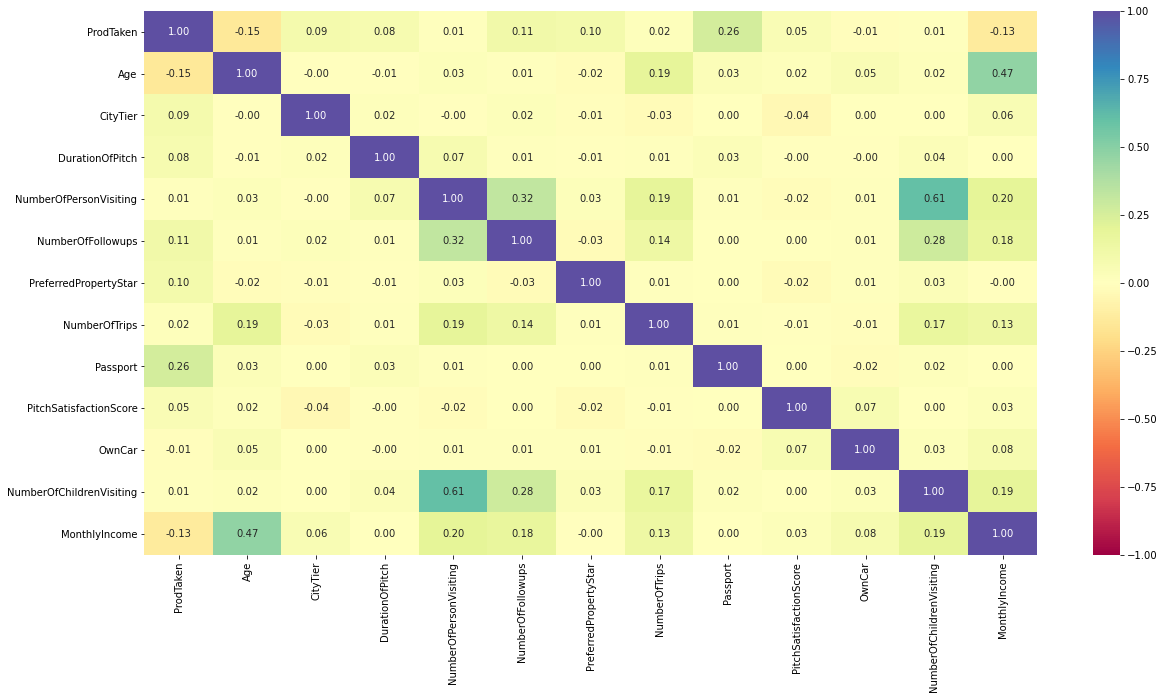

In [140]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral") # Depecting the correlation of features in heatmap
plt.show()

* There are a few variables that are correlated with each other but there are no surprises here.
* Age and Monthly Income is less than 50% correlated

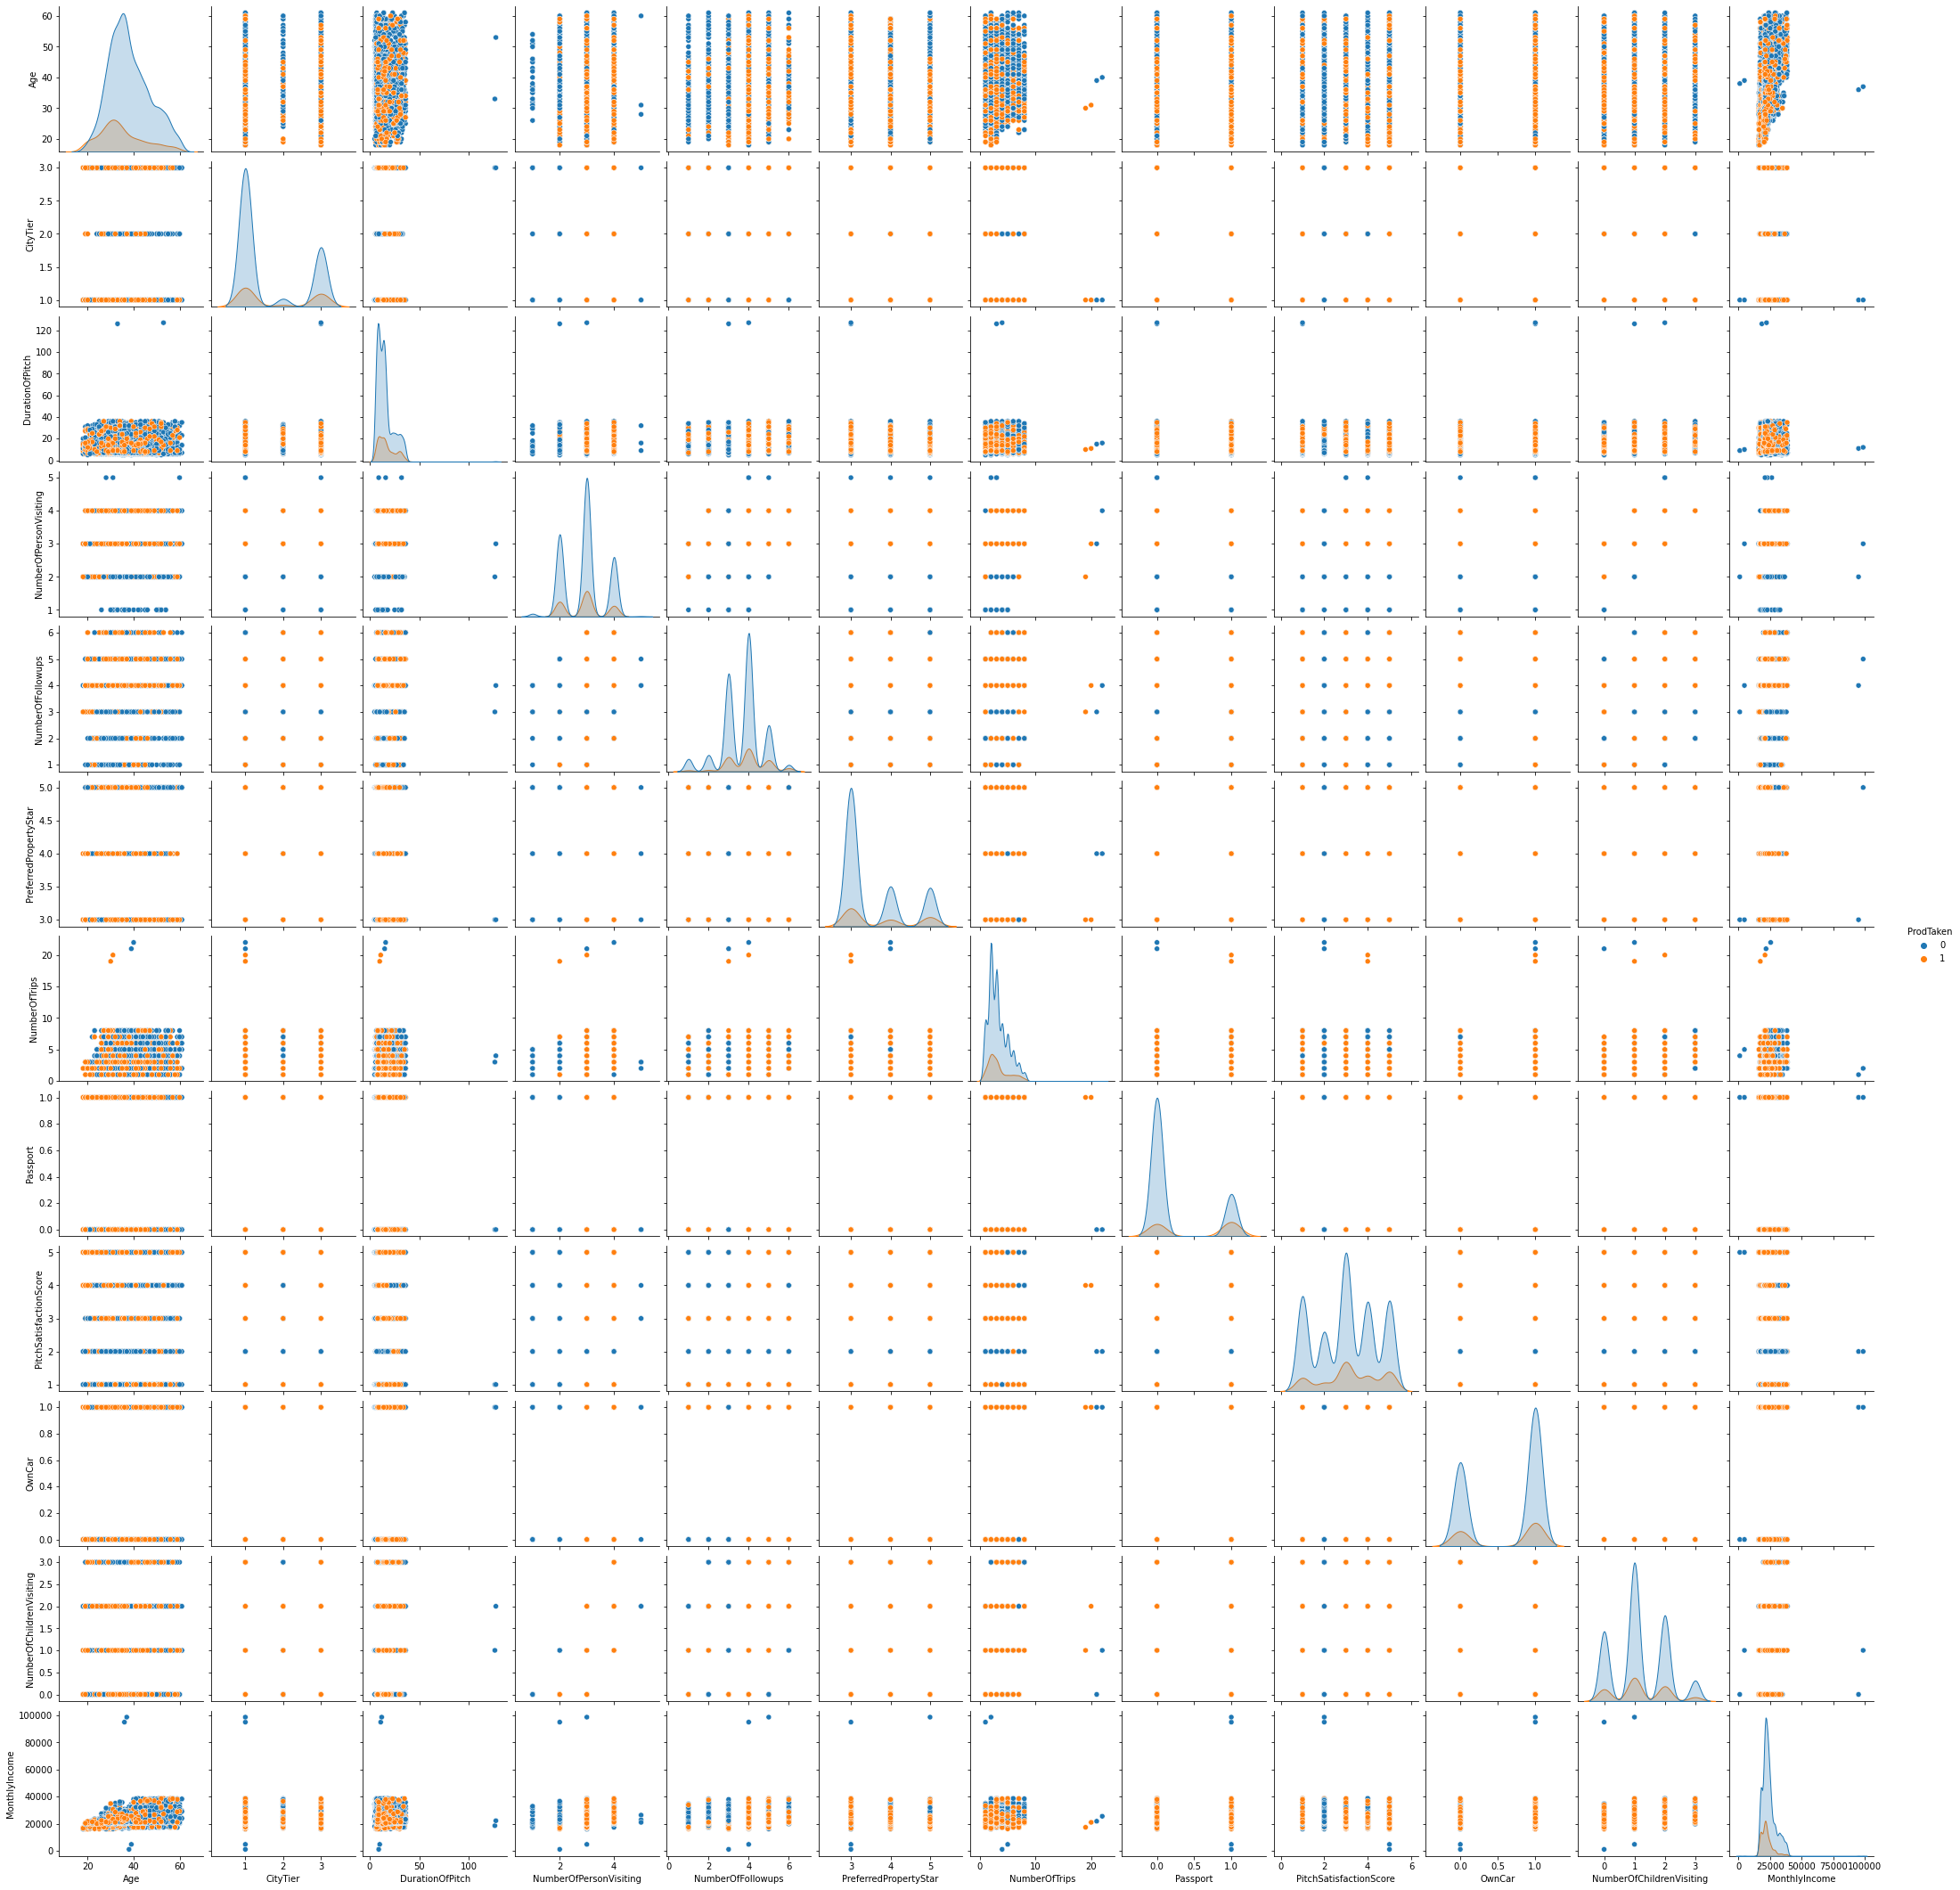

In [141]:
sns.pairplot(data,hue='ProdTaken') # Pair plot with Prod Taken
plt.show()

* We can see varying distributions in variables for ProdTaken, we should investigate it further.

### ProdTaken vs MonthlyIncome of Customer

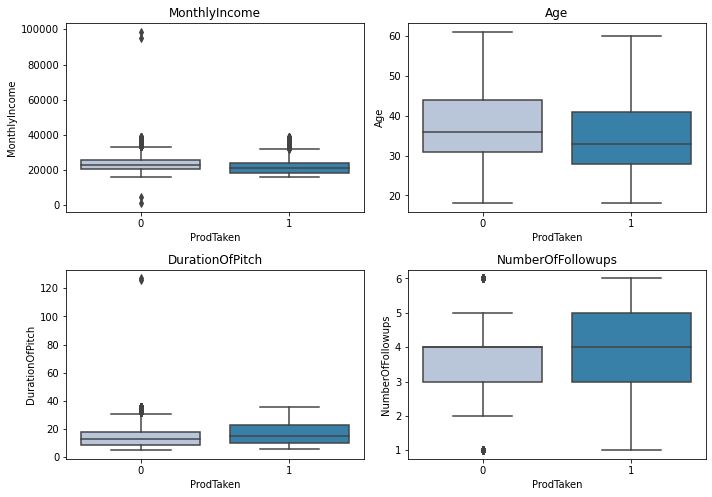

In [142]:
cols = data[['MonthlyIncome','Age','DurationOfPitch','NumberOfFollowups' ]].columns.tolist() #Loading columns to list
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols): #looping through columns to create box plot
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Customer with almost same monthly income in both the categories of Product taken and not taken
* Age group between 30 and 40 are the customer who are purchasing the products
* More numberoffollowups has impact on selling the packages
* Longer duration of convincing customer to purchase the product has impact on purchasing the product

### ProdTaken vs NumberOfTrips

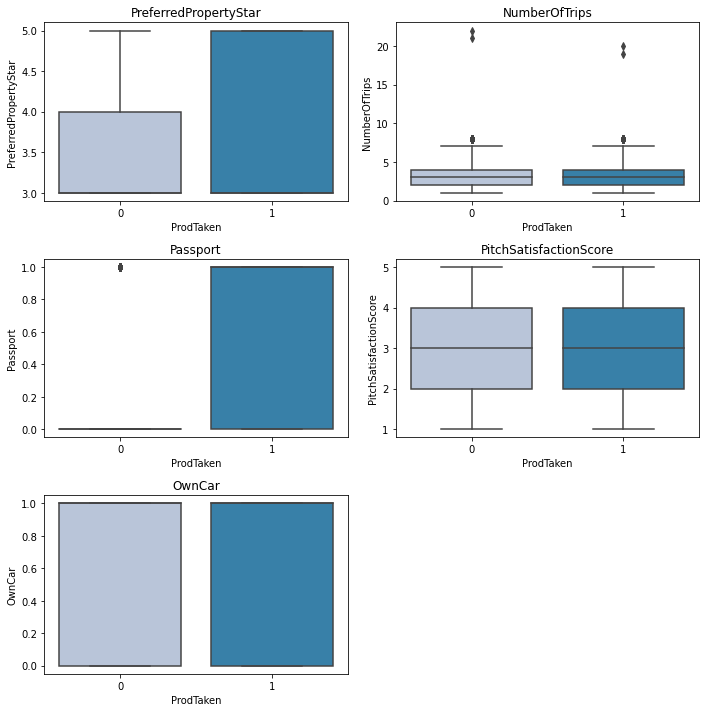

In [143]:
cols = data[['PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar' ]].columns.tolist()
plt.figure(figsize=(10,10)) #Loading columns to list

for i, variable in enumerate(cols): #looping through columns to create box plot
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Higher star for the property the success rate of purchasing the holiday package is more
* Numbertrips feature didn't impacted the outcome of purchasing the holiday package
* Pitchsatisfactionscore didn't influence the purchasing of the product
* Owncar feature didn't influence the purchasing of the product

In [144]:
# function to plot stacked bar chart


def my_stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


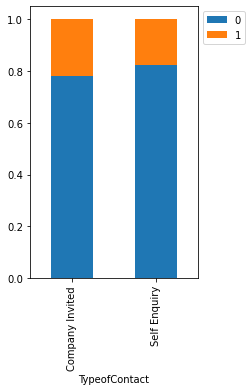

In [145]:
my_stacked_barplot(data, "TypeofContact", "ProdTaken") # Creating Stacked bar plot for TypeofContact and ProdTaken

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


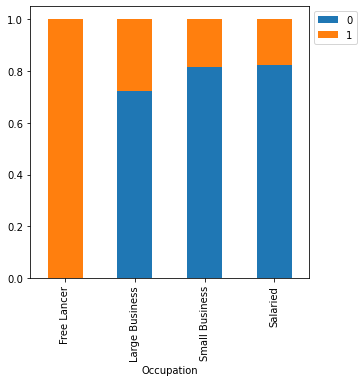

In [146]:
my_stacked_barplot(data, "Occupation", "ProdTaken") # Creating Stacked bar plot for Occupation and ProdTaken

* Customers with occupation of Salaried and Small Business are purchasing the travel packages
* Customers with occupation of free lancer purchased only twice

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


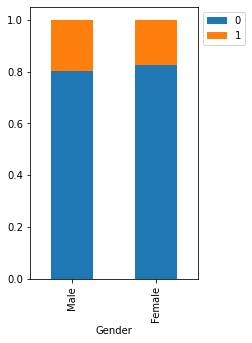

In [147]:
my_stacked_barplot(data, "Gender", "ProdTaken") # Creating Stacked bar plot for Gender and ProdTaken

* Irrespective of gender, the rate of product take is less when compared to not taken
* Male are the more frequent buyers of the travel package

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


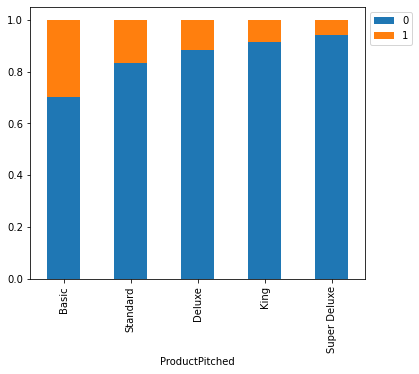

In [148]:
my_stacked_barplot(data, "ProductPitched", "ProdTaken") # Creating Stacked bar plot for ProductPitched and ProdTaken

* Basic is popular Product, when compared to other products
* Data set is showing that when compared to product purchased not purchased customers are more

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


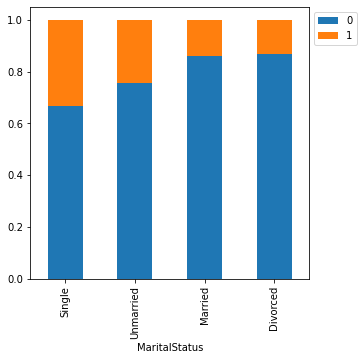

In [149]:
my_stacked_barplot(data, "MaritalStatus", "ProdTaken")   # Creating Stacked bar plot for MaritalStatus and ProdTaken

* Customers who are single and not married are most likely purchasing the product
* Percentage of not purchasing product is more than purchasing the product

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


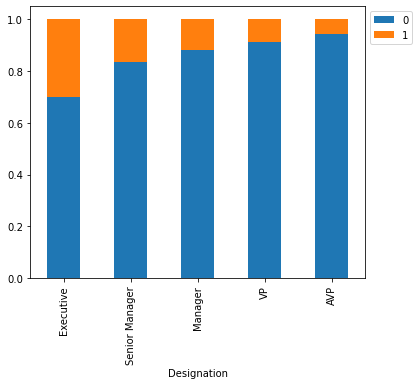

In [150]:
my_stacked_barplot(data, "Designation", "ProdTaken") # Creating Stacked bar plot for Designation and ProdTaken

* Executives are most likely purchasing the product when compare to other designation
* Data set contains customers in manager and above role

**Checking if MaritalStatus and NumberOfTrips are related-**

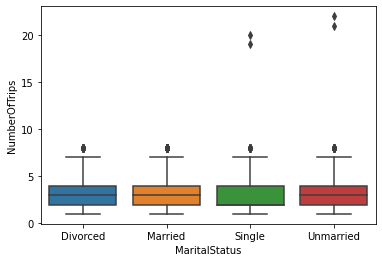

In [151]:
sns.boxplot(data['MaritalStatus'],data['NumberOfTrips']) # Creating box plot for MaritalStatus and NumberOfTrips
plt.show()

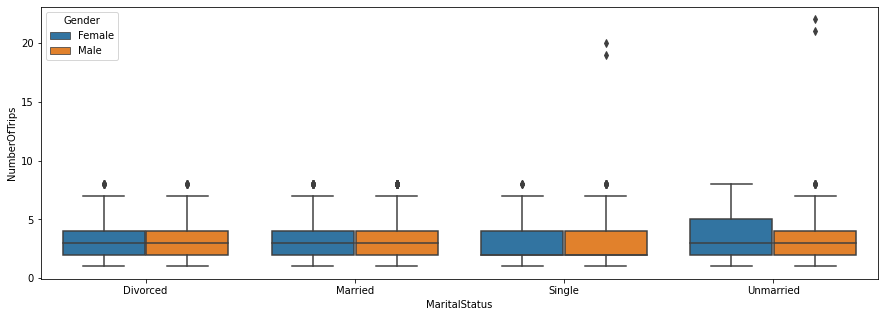

In [152]:
plt.figure(figsize=(15,5))  # Creating box plot for NumberOfTrips and Gender
sns.boxplot(data['MaritalStatus'],data['NumberOfTrips'],hue=data['Gender'])
plt.show()

* Male customer are having the highest number of trips irrespective of martial status
* Not much of outliers observed in the number of trips
* Customers who are not married (Single, Divorced and Un married) are going on trips frequently

### <a id='link1'>Summary of EDA</a>

**Data Description:**

* Data set contains 4888 rows  and 20 columns
* There are null values in the dataset.
* We can convert the object type columns to categories.
* TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation are object data type and remaining are Integer and float

**Data Cleaning:**

* CustomerID is an ID variable and not useful for predictive modeling.
* Fill the null value with Median value of the column
* Updating Gender value "Fe Male" with "Female"

**Observations from EDA:**

* `ProdTaken` is a dependent variable, whose output will be predicted by the model
* `Age` of the customer range form 18 to 61 and average age is 36
* `CityTier` feature gives the information regarding in which area of the city the customer lives. Three values 1, 2 and 3
* `DurationOfPitch` is how long the cusomter service specailist spoke to customer sell the new product
* `NumberOfPersonVisiting` feature give the information regarding no of persons accompying the customers on to the trip, Min is 1 and max is 5. Avergae size is 3
* `NumberOfFollowups` number of times does the sales represntative followed up with customer to sell the product. Max times is 6 and average is 4
* `PreferredPropertyStar` is a important feature to predict the outcome as this feature will give information reagarding what type of property does customer like min is 1 nd max is 5 average value is 4 star
* `NumberOfTrips` Customers have taken max of 22 trip and min of 1 with average of 3 trips
* `Passport` feature will give info that how many cutomers are ready to travel international
* `PitchSatisfactionScore` How many cusomters are satisfied with sales pitch, max score is 5 and average score is 3
* `OwnCar` This feature will provide information regarding how many customers own the car or not
* `NumberOfChildrenVisiting` Number of children accompanied in the trip is important as children attractions can be included. Max children accompanied is 3
* `MonthlyIncome` Monthly income of the customer is used in the model to predict the outcome, Minimum monthly income is 1000 amd max is 98678.0. It is evident that customer with all income levels are purchasing the holiday packages

 

* **ProdTaken vs MonthlyIncome of Customer**:
    * Customer with almost same monthly income in both the categories of Product taken and not taken
    * Age group between 30 and 40 are the customer who are purchasing the products
    * More numberoffollowups has impact on selling the packages
    * Longer duration of convincing customer to purchase the product has impact on purchasing the product

* **ProdTaken vs NumberOfTrips**
  * Higher star for the property the success rate of purchasing the holiday package is more
  * Numbertrips feature didn't impacted the outcome of purchasing the holiday package
  * Pitchsatisfactionscore didn't influence the purchasing of the product
  * Owncar feature didn't influence the purchasing of the product
   

* Male customer are having the highest number of trips irrespective of martial status
* Not much of outliers observed in the number of trips
* Customers who are not married (Single, Divorced and Un married) are going on trips frequently

## Model Building - Approach
1. Data preparation
2. Split the data into the train and test set.
3. Train models on the training data.
4. Try to improve the model performance using hyperparameter tuning.
5. Test the performance on the test data.

## Split Data

In [153]:
X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

In [154]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,0,0,0,1,0,0,1,0,0
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,...,0,0,0,0,1,0,1,0,0,0
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,0,0,0,0,0,1,0,0,0
4,31.0,1,8.0,2,3.0,4.0,1.0,0,5,1,...,0,0,0,0,0,0,1,0,0,0


In [155]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 28) (1467, 28)


**The Stratify arguments maintain the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [156]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [157]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a customer will purchase new travel package and the customer doesn't purchase
2. Predicting a customer will not purchase new travel package and the customer purchase
### Which case is more important? 
* Predicting that customer will not purchase new travel package but customer purchases i.e. losing a valuable customer.
### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can add attaractions to new travel package to retain customers rate especially for frequent travel customer thereby attracting new customers and improving overall business.

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [158]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def my_model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [159]:
def my_confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.907294  0.735507   0.763158  0.749077


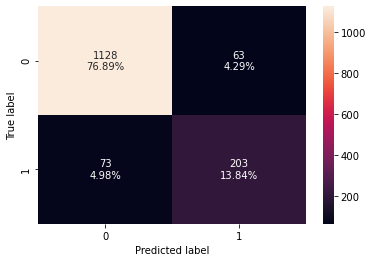

In [160]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=my_model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=my_model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(d_tree,X_test,y_test)

* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.
* Let's try hyperparameter tuning and see if the model performance improves.

**Confusion Matrix -**

* Customer purchased product and the model predicted it correctly that customer purchased Product : True Positive (observed=1,predicted=1)

* Customer didn't purchased the product and the model predicted that customer purchased package : False Positive (observed=0,predicted=1)

* Customer didn't purchased and the model predicted will not purchase the product : True Negative (observed=0,predicted=0)

* Customer purchased the product and model predicted that custpmer won't: False Negative (observed=1,predicted=0)


### Hyperparameter Tuning

In [161]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.907294  0.735507   0.763158  0.749077


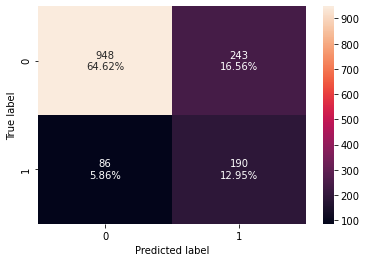

In [162]:
#Calculating different metrics
dtree_estimator_model_train_perf=my_model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=my_model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* Model performed well on the training data and overfitted on the testing data
* No significant improvement in the model even with hyper tunning

## Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.916155  0.594203   0.937143  0.727273


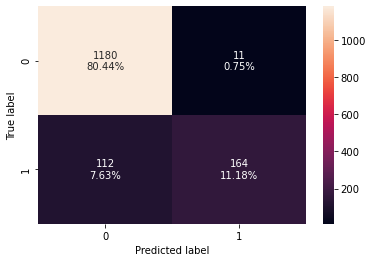

In [163]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=my_model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=my_model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest classifier is working well on the training data but is not able to generalize well on the test data concerning the recall.
* Let's try hyperparameter tuning and see if the model performance improves

### Hyperparameter Tuning

In [164]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=25,
                       max_features=None, oob_score=True, random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.920245  0.623188    0.92973  0.746204


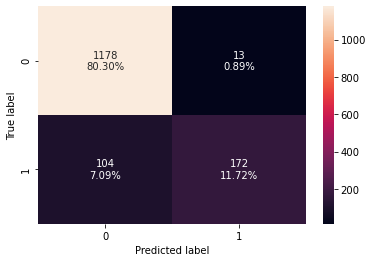

In [165]:
#Calculating different metrics
rf_tuned_model_train_perf=my_model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=my_model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* Model performed well on the training data and overfitted on the testing data
* No significant improvement in the model even with hyper tunning but better than without hyper tuning

### Bagging Classifier

   Accuracy   Recall  Precision        F1
0  0.993861  0.97205   0.995231  0.983504
   Accuracy    Recall  Precision        F1
0   0.90593  0.605072   0.852041  0.707627


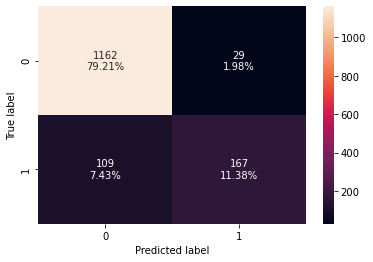

In [166]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=my_model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=my_model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

### Hyperparameter Tuning

In [167]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.999415  0.996894        1.0  0.998445
   Accuracy    Recall  Precision        F1
0  0.923654  0.634058    0.94086  0.757576


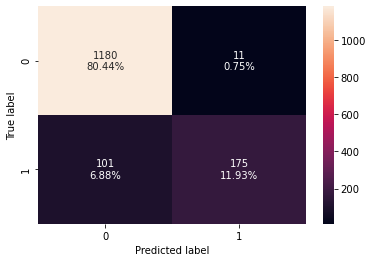

In [168]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=my_model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=my_model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* There is not much improvement in metrics of hyper tuned random forest as compared to the regular random forest.

## Boosting Models

## AdaBoost Classifier


   Accuracy    Recall  Precision        F1
0  0.845075  0.307453   0.702128  0.427646
   Accuracy    Recall  Precision    F1
0  0.844581  0.311594   0.693548  0.43


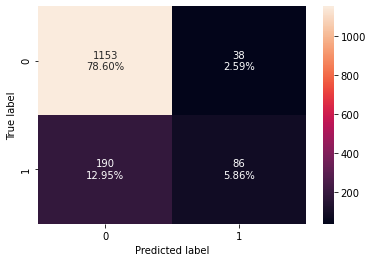

In [169]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=my_model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=my_model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving more generalized performance than previous models but the test Recall  is too low. 

### Hyperparameter Tuning

In [170]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.7000000000000001, n_estimators=90,
                   random_state=1)

   Accuracy    Recall  Precision        F1
0  0.973107  0.889752   0.964646  0.925687
   Accuracy    Recall  Precision        F1
0  0.889571  0.608696   0.756757  0.674699


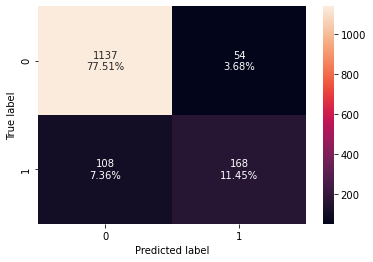

In [171]:
#Calculating different metrics
abc_tuned_model_train_perf=my_model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=my_model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* Adaboost is giving more generalized performance than previous models but the test Recall improved when compared to previous models
* Hyper tuning improved the model performance and recall is slightly better

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.885998  0.451863   0.887195  0.598765
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.867076  0.387681   0.804511  0.523227


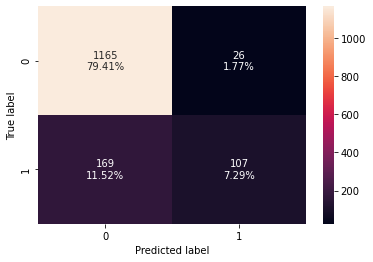

In [172]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=my_model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=my_model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is overfitting the training data.
* Recall is low on training and testing data when compared to other models

### Hyperparameter Tuning

In [173]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.923999  0.636646   0.940367  0.759259
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.881391  0.48913   0.803571  0.608108


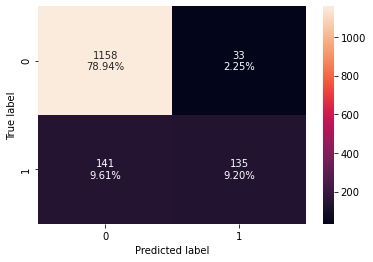

In [174]:
#Calculating different metrics
gbc_tuned_model_train_perf=my_model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=my_model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* Recall low when compared to previous models and no significant improvement observed when compared to previous models
* Hyper tuning didn't help to improve the performance of the model

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999708  0.998447        1.0  0.999223
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.927744  0.702899   0.889908  0.785425


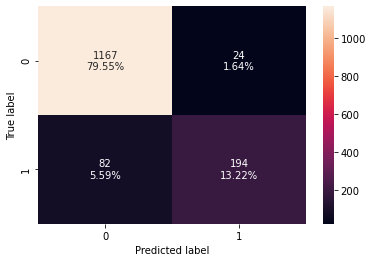

In [175]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=my_model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=my_model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* XGBoost classifier is overfitting the training data.
* XGBoost improved the recall when compared to other models
* Let's try hyperparameter tuning and see if the model performance improves.  

### Hyperparameter Tuning

In [176]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=16, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.966969  0.990683   0.856376  0.918647
Testing performance:
    Accuracy   Recall  Precision        F1
0   0.90184  0.82971   0.702454  0.760797


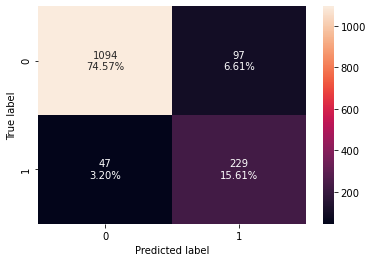

In [177]:
#Calculating different metrics
xgb_tuned_model_train_perf=my_model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=my_model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
my_confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The overfitting has reduced significantly and model performance improved
* Recall significantly improved with XGBoost hyper tuning.
* So far this is the best model to predict the outcome

## Comparing all models

In [178]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,1.0,1.0,1.0,1.0,0.993861,0.999415,0.845075,0.973107,0.885998,0.923999,0.999708,0.966969
Recall,1.0,1.0,1.0,1.0,0.972050,0.996894,0.307453,0.889752,0.451863,0.636646,0.998447,0.990683
Precision,1.0,1.0,1.0,1.0,0.995231,1.000000,0.702128,0.964646,0.887195,0.940367,1.000000,0.856376
F1,1.0,1.0,1.0,1.0,0.983504,0.998445,0.427646,0.925687,0.598765,0.759259,0.999223,0.918647


In [179]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,0.907294,0.907294,0.916155,0.920245,0.905930,0.923654,0.844581,0.889571,0.867076,0.881391,0.927744,0.901840
Recall,0.735507,0.735507,0.594203,0.623188,0.605072,0.634058,0.311594,0.608696,0.387681,0.489130,0.702899,0.829710
Precision,0.763158,0.763158,0.937143,0.929730,0.852041,0.940860,0.693548,0.756757,0.804511,0.803571,0.889908,0.702454
F1,0.749077,0.749077,0.727273,0.746204,0.707627,0.757576,0.430000,0.674699,0.523227,0.608108,0.785425,0.760797


* All the models performed well on training sets
* Some level of overfitting observed on all the models
* Decision Tree Estimator better recall is better
* XGBoost Classifier Tuned is the best model so far to predict outcome

### Feature importance of Tuned Random Forest

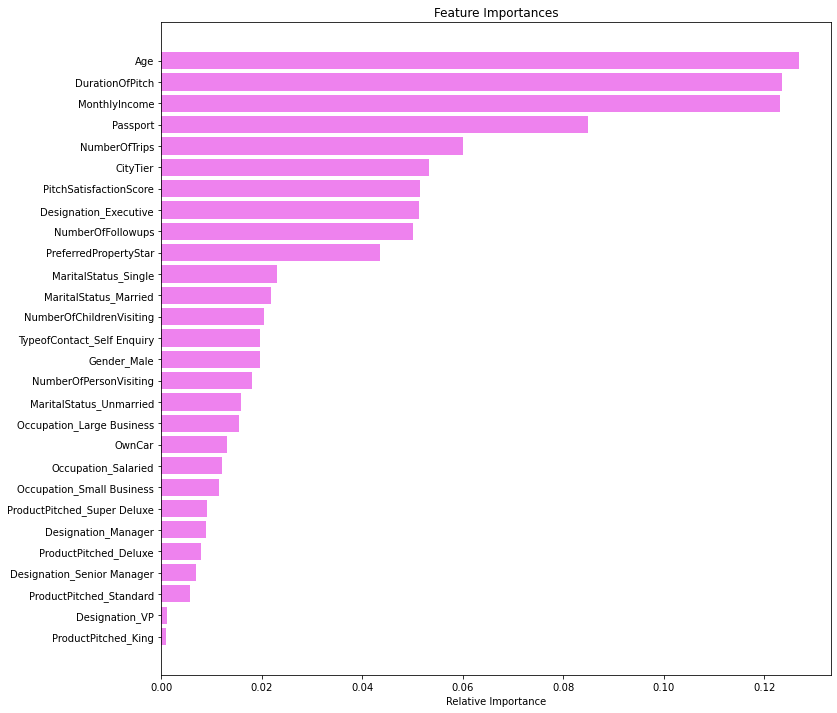

In [180]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Age, DurationofPicth and MonthlyIncome are the most important features in predicting the potential customer who is going to purchase the newly introduced travel package

## Business Insights and Recommendations

* We have been able to build a predictive model:
  a) that company can deploy this model to identify customers who might purchase the newly introduced travel package.
  b) that company can use to find the drivers for identifying the potential customers. 
  c) based on which company can take appropriate actions to build better marketing campagins.
* Factors that drive Purchase of Wellness Tourism Package  - Age,DurationofPicth and MonthlyIncome.
* Age: Customer between age 30 and 40 are more willing go on vacation and mostly likly to purchase the wellness tourism package
* DurationofPicth: Its better to create a play book to target the customer so each and every sales rep will be consistent in explaining the package
* MontlyIncome: Target customers who are earning more as they might intreset in changing the life style by opting the Wellness Tourism Package

* It is recommended to start a marketing campagain at corporates as they are most like to purchase the new package. Most of the customer are in managerial level and above

* Potential customer are mostly single male population. It is better to carve out the package with more outdoor activities which help to rejunivate.

* It is recommend to target the customers in different segment(s) and city tiers to not only retrain the current customers and to attract the new customers
